In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier


In [2]:
# Suppress warnings for cleaner output
import warnings

warnings.filterwarnings("ignore")


In [3]:
# Load dataset
data_filepath = 'diabetes.csv'
diabetes_data = pd.read_csv(data_filepath)


In [4]:
# Preview the dataset
print(diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print(diabetes_data.describe())



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
print(f"Dataset shape: {diabetes_data.shape}")

Dataset shape: (768, 9)


In [8]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

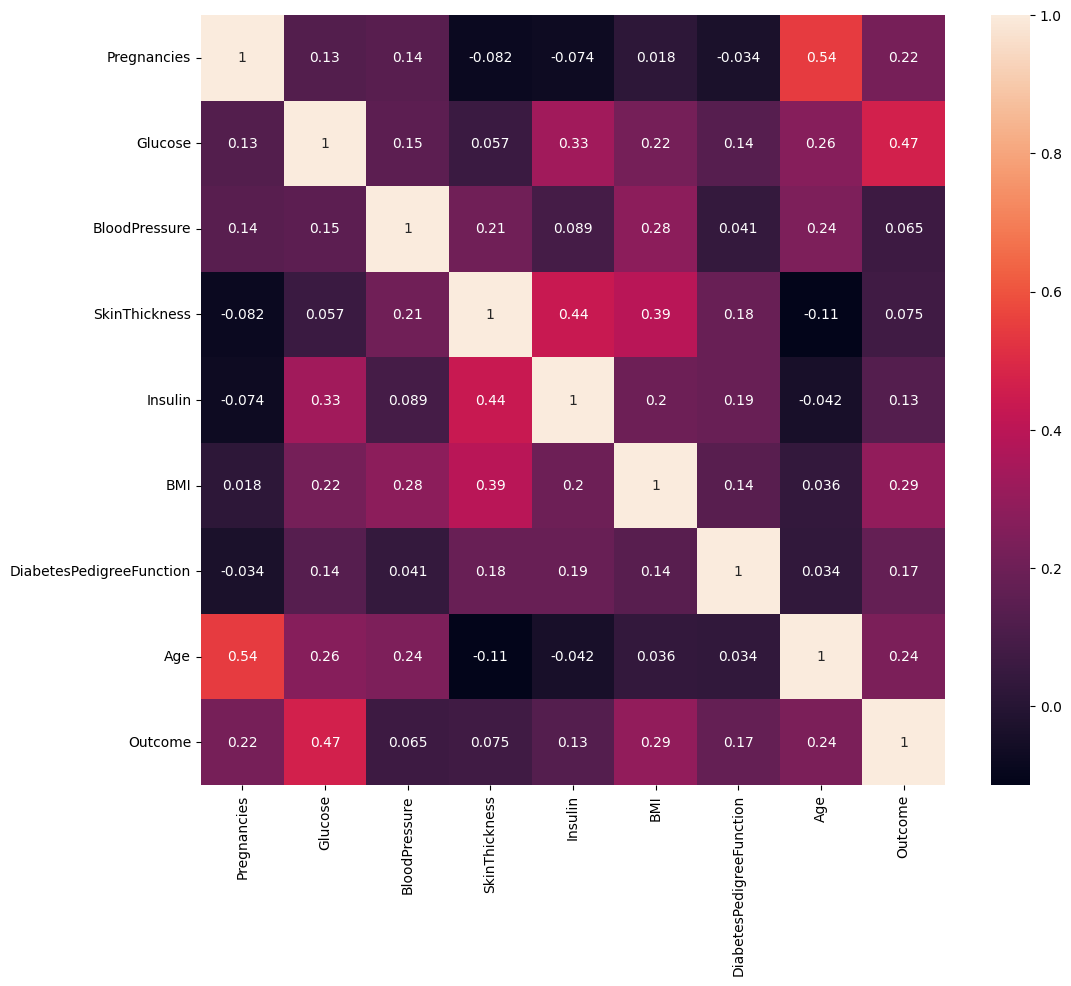

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_data.corr(), annot=True)


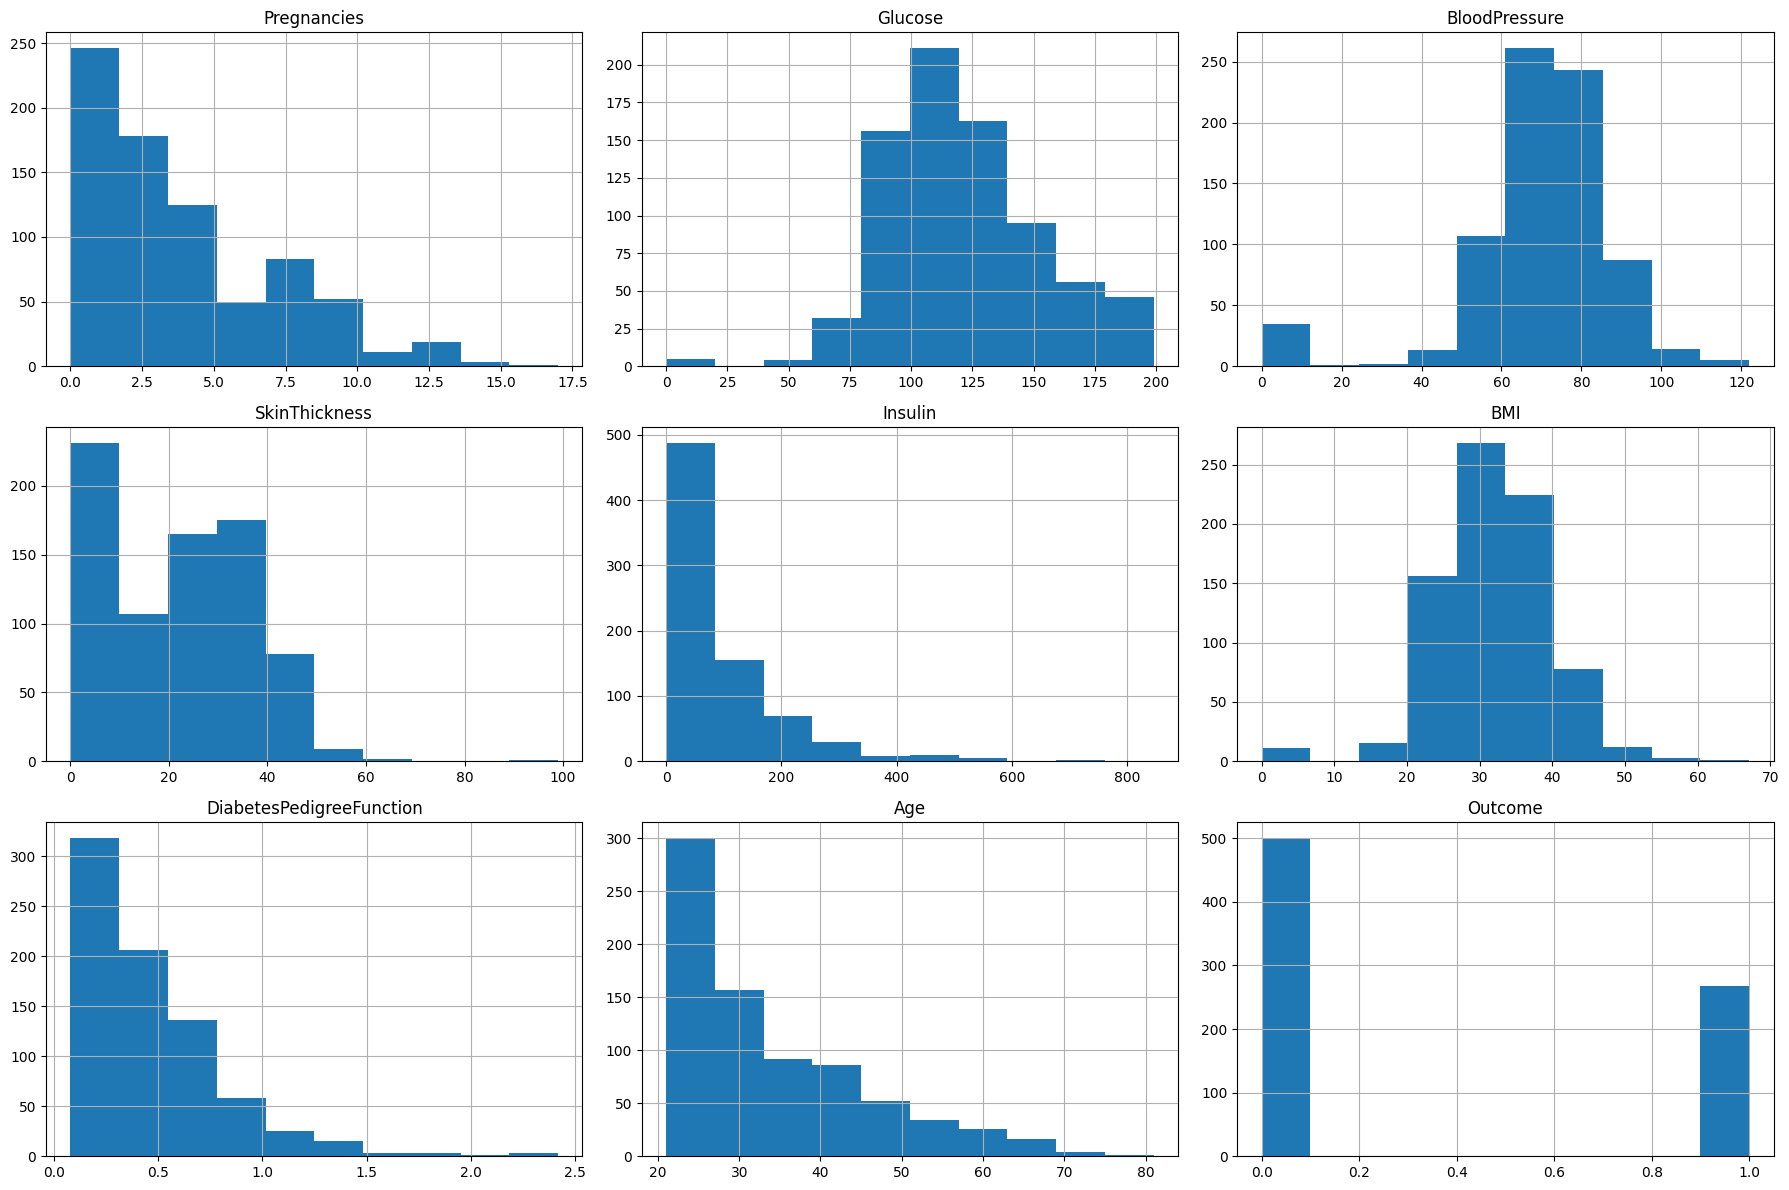

In [11]:
# Histogram of features
diabetes_data.hist(figsize=(18, 12))
plt.tight_layout()
plt.show()

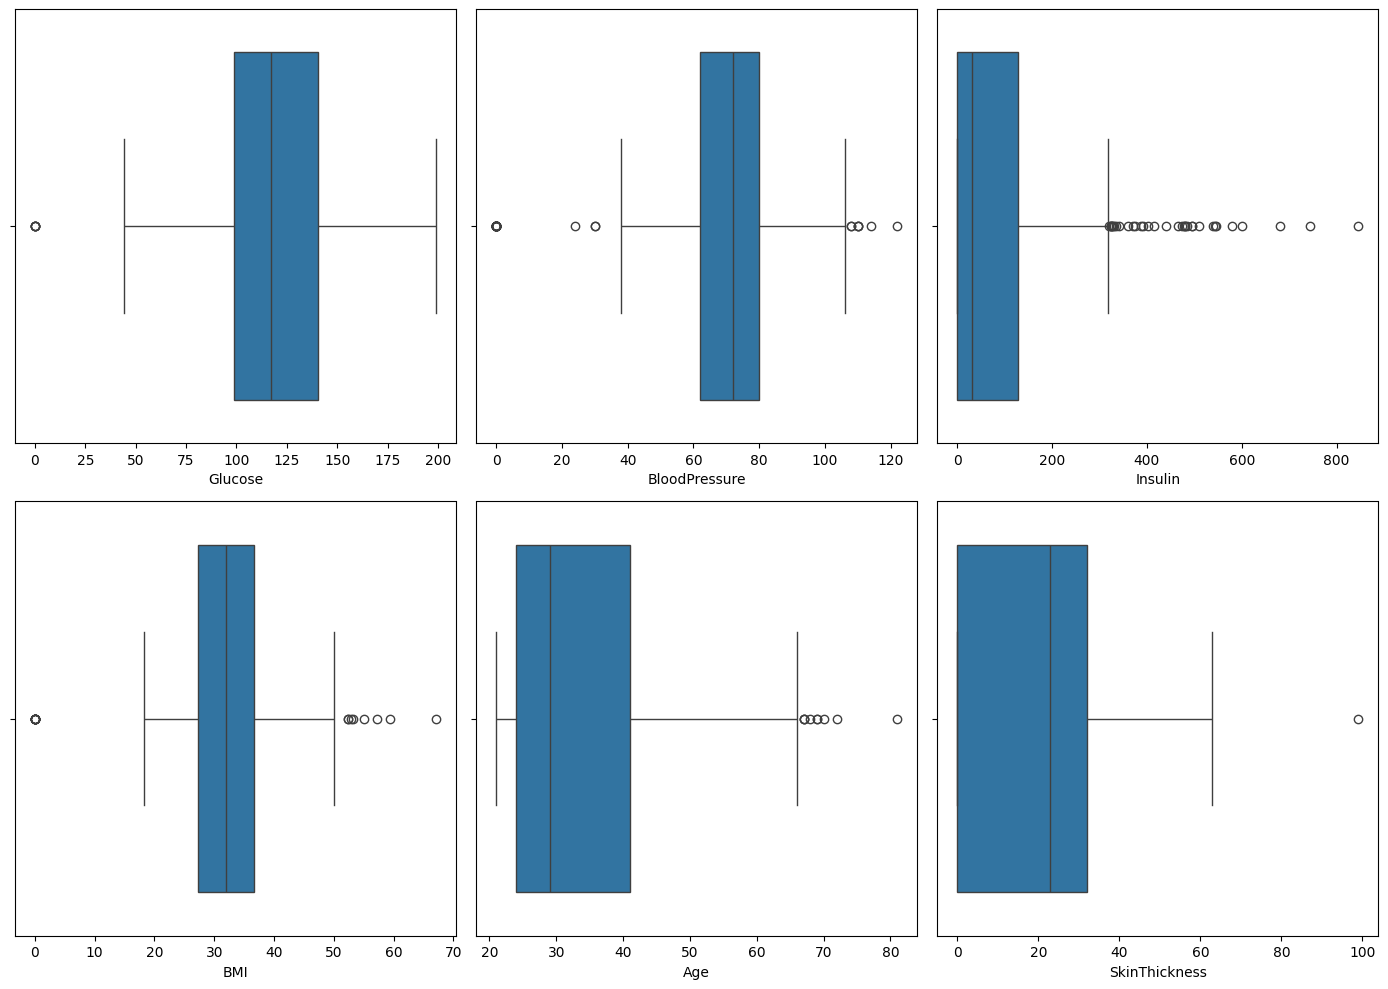

In [12]:
# Box plots for feature distribution
plt.figure(figsize=(14, 10))
features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'SkinThickness']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=diabetes_data, x=feature)
plt.tight_layout()
plt.show()

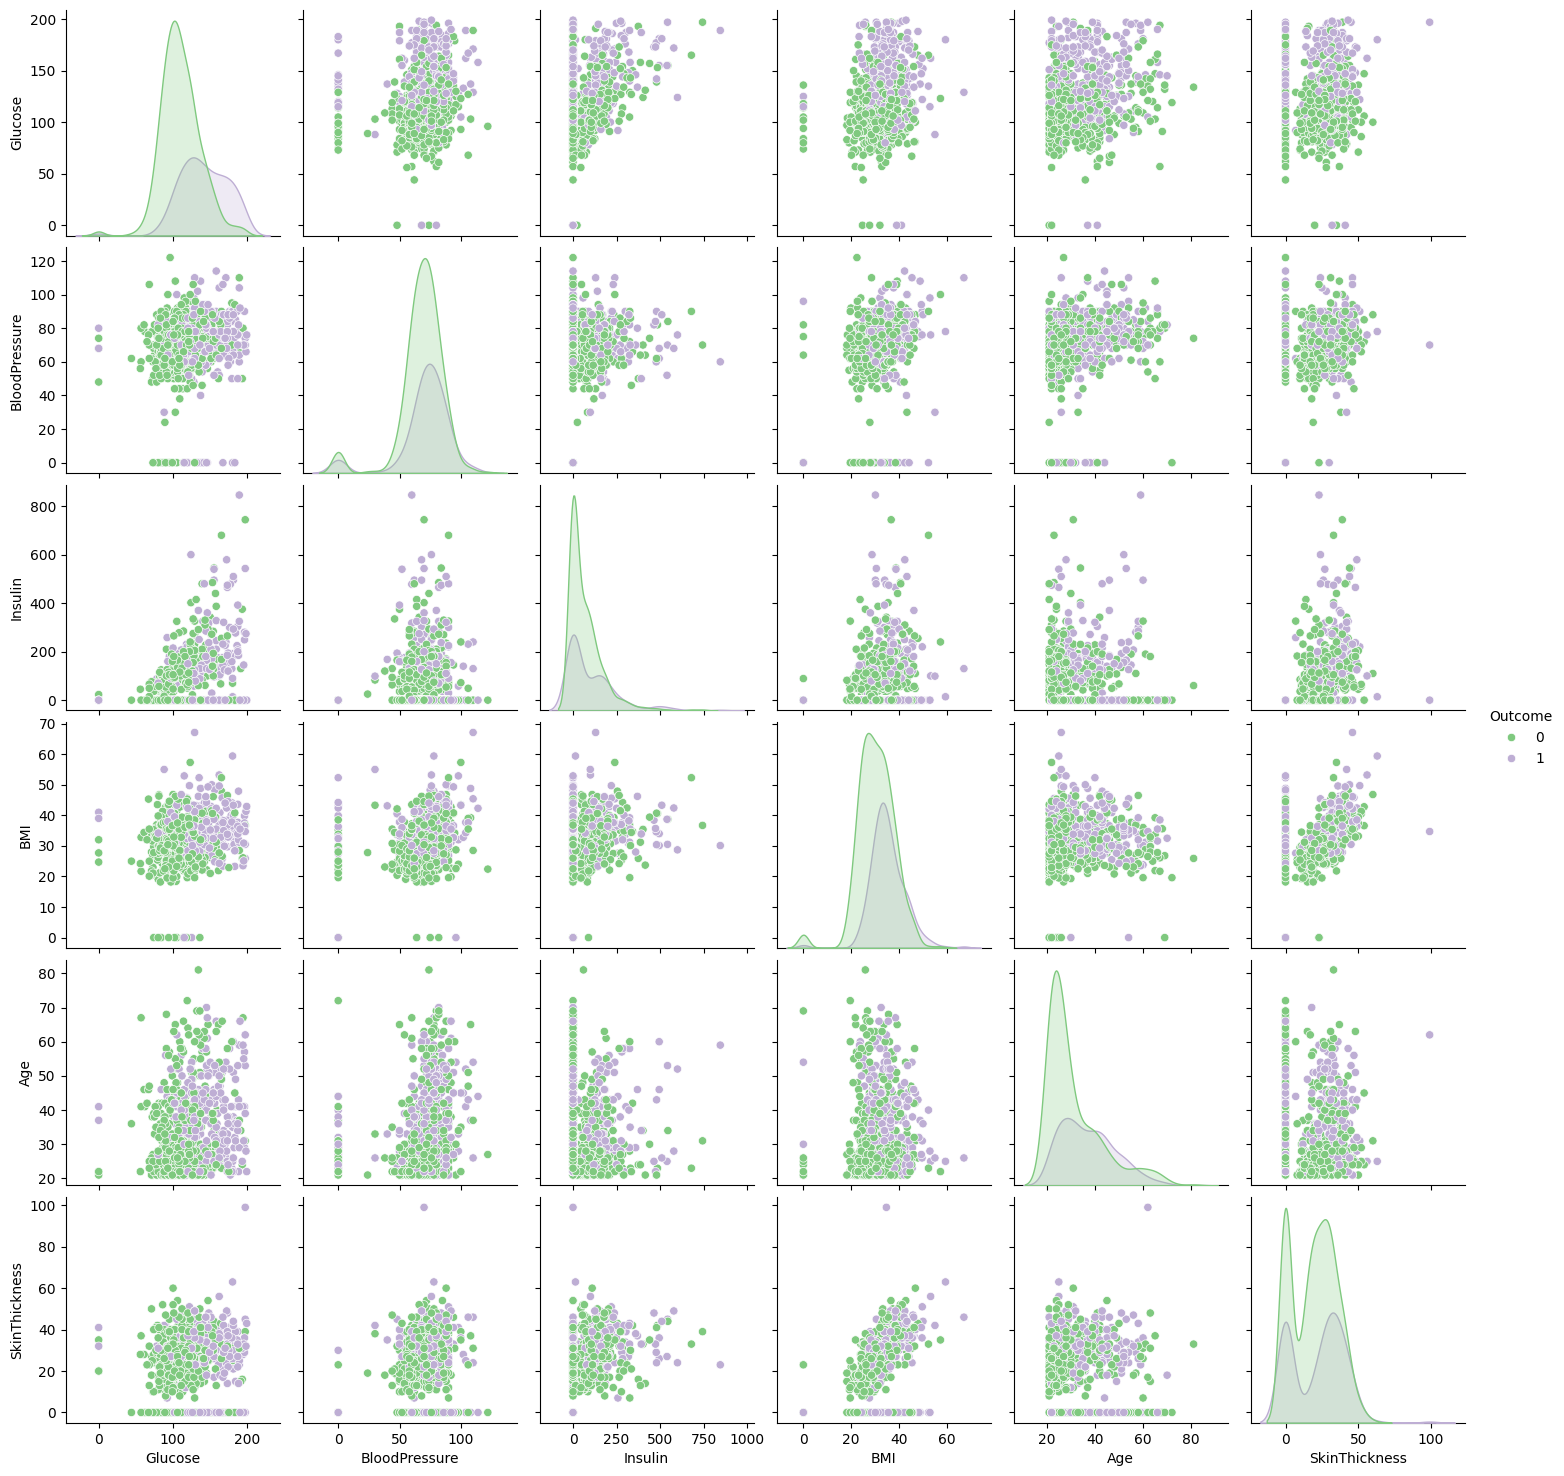

In [13]:
# Pairplot to visualize feature relationships
sns.pairplot(diabetes_data, vars=features, hue='Outcome', palette='Accent')

In [14]:
# Train-test split
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Display training and test sizes
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 614
Test set size: 154


In [16]:
# Model definitions
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=7),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=6, random_state=123, criterion='entropy'),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(objective='reg:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
}


In [21]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{model_name} Results:")
    print("Classification Report:\n", classification_report(y_test, y_pred),"\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),"\n")
    print("Training Score: {:.2f}%".format(model.score(X_train, y_train) * 100),"\n")
    print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred)),"\n")
    print("R2 Score: {:.2f}".format(r2_score(y_test, y_pred)),"\n")




Logistic Regression Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154
 

Confusion Matrix:
 [[98  9]
 [18 29]] 

Training Score: 77.20% 

Mean Squared Error: 0.18 

R2 Score: 0.17 


K-Neighbors Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154
 

Confusion Matrix:
 [[90 17]
 [20 27]] 

Training Score: 78.18% 

Mean Squared Error: 0.24 

R2 Score: -0.13 


Support Vec

In [20]:
 # Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{model_name} Results:")
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))



Logistic Regression Results:
Accuracy: 82.47%

K-Neighbors Classifier Results:
Accuracy: 75.97%

Support Vector Classifier Results:
Accuracy: 79.22%

Naive Bayes Results:
Accuracy: 79.22%

Decision Tree Classifier Results:
Accuracy: 73.38%

Random Forest Classifier Results:
Accuracy: 80.52%

AdaBoost Classifier Results:
Accuracy: 77.92%

Gradient Boosting Classifier Results:
Accuracy: 81.82%

XGBoost Classifier Results:
Accuracy: 72.08%

Extra Trees Classifier Results:
Accuracy: 80.52%


In [18]:

# Making predictions
sample_input = np.array([[1, 148, 72, 35, 79.799, 33.6, 0.627, 50]])
predicted_outcome = models["Logistic Regression"].predict(sample_input)

if predicted_outcome == 1:
    print("Predicted Outcome: Diabetic")
else:
    print("Predicted Outcome: Non-Diabetic")

Predicted Outcome: Diabetic
